In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', 150)

In [3]:
quora=pd.read_csv('data/quora-question-pairs/train.csv', index_col=0)#, nrows=10000)

Numbers
Dates
People
Organizations

In [7]:
from src.utils import get_entities, parallelize

In [126]:
%%time
quora=find_ents(quora)

CPU times: user 1h 8min 37s, sys: 12.5 s, total: 1h 8min 49s
Wall time: 1h 8min 53s


In [127]:
#quora.to_csv('data/quora_train_with_ent.csv')

In [18]:
quora=pd.read_csv('data/quora_train_with_ent.csv', index_col=0)
quora['q1_ent']=quora['q1_ent'].apply(lambda e: eval(e))
quora['q2_ent']=quora['q2_ent'].apply(lambda e: eval(e))

In [19]:
quora.head()

,qid1,qid2,question1,question2,is_duplicate,q1_ent,q2_ent
id,,,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[{'text': 'india', 'label': 'GPE'}]",[]
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[{'text': 'Kohinoor', 'label': 'GPE'}]","[{'text': 'Indian', 'label': 'NORP'}]"
2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,"[{'text': 'VPN', 'label': 'ORG'}]","[{'text': 'DNS', 'label': 'ORG'}]"
3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,[],"[{'text': '24,23', 'label': 'CARDINAL'}]"
4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[{'text': 'one', 'label': 'CARDINAL'}]",[]


In [6]:
from sentence_transformers import SentenceTransformer
model1 = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [12]:
%%time
quora['similarity']=get_similarities(quora, model1)

CPU times: user 13min 28s, sys: 8.77 s, total: 13min 37s
Wall time: 2min 16s


<AxesSubplot:ylabel='Frequency'>

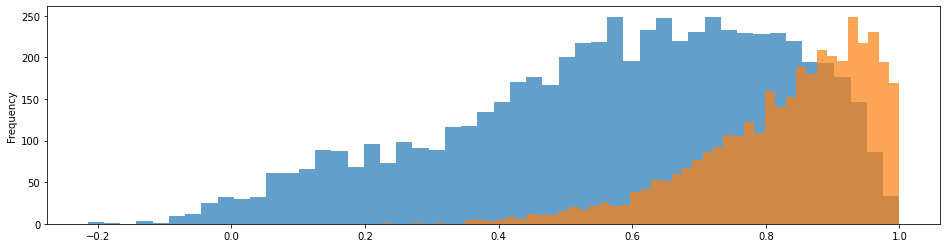

In [21]:
quora[quora.is_duplicate==0].similarity.plot.hist(bins=50,figsize=(16,4),alpha=0.7)
quora[quora.is_duplicate==1].similarity.plot.hist(bins=50,figsize=(16,4),alpha=0.7)

In [29]:
quora[(quora.is_duplicate==0)&(quora.similarity>0.96)].head(50)

,qid1,qid2,question1,question2,is_duplicate,similarity
id,,,,,,
41,83,84,When can I expect my Cognizant confirmation mail?,When can I expect Cognizant confirmation mail?,0,0.967385
298,596,597,On what online platforms can I post ads for beer money opportunity?,What online platforms can I post ads for beer money opportunity?,0,0.995172
328,655,656,What is journalism for you?,What is journalism?,0,0.961766
525,1048,1049,How can I treat a severe foot sprain?,How can I get a severe foot sprain?,0,0.974651
563,1124,1125,How would you destroy the world?,How can I destroy the world?,0,0.963545
585,1168,1169,Can you play Asian Playstation 4 games on a European Playstation?,Can you play Asian Playstation 4 games on a European Playstation 4?,0,0.989448
679,1355,1356,What is the essence of enlightenment?,What is enlightenment?,0,0.969232
867,1729,1730,How can constipation cause dizziness?,Can constipation cause dizziness?,0,0.983848
1107,2207,2208,How's life going?,How is your life going?,0,0.971955


In [87]:
quora[quora.q1_ent.apply(lambda x: len(x))>1]

,qid1,qid2,question1,question2,is_duplicate,similarity,q1_ent,q2_ent
id,,,,,,,,
9,19,20,Motorola (company): Can I hack my Charter Motorolla DCX3400?,How do I hack Motorola DCX3400 for free internet?,0,0.810972,"[{'text': 'Motorola', 'label': 'ORG'}, {'text': 'Motorolla DCX3400', 'label': 'PERSON'}]","[{'text': 'Motorola', 'label': 'ORG'}]"
14,29,30,"What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?",What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan?,0,0.874693,"[{'text': 'US', 'label': 'GPE'}, {'text': 'Canada', 'label': 'GPE'}]","[{'text': 'US', 'label': 'GPE'}, {'text': 'Japan', 'label': 'GPE'}]"
18,37,38,Why are so many Quora users posting questions that are readily answered on Google?,Why do people ask Quora questions which can be answered easily by Google?,1,0.890718,"[{'text': 'Quora', 'label': 'PERSON'}, {'text': 'Google', 'label': 'ORG'}]","[{'text': 'Quora', 'label': 'PERSON'}, {'text': 'Google', 'label': 'ORG'}]"
23,47,48,How much is 30 kV in HP?,Where can I find a conversion chart for CC to horsepower?,0,0.489311,"[{'text': '30', 'label': 'CARDINAL'}, {'text': 'HP', 'label': 'GPE'}]",[]
33,67,68,"Does the United States government still blacklist (employment, etc.) some United States citizens because their political views?",How is the average speed of gas molecules determined?,0,0.083931,"[{'text': 'United States', 'label': 'GPE'}, {'text': 'United States', 'label': 'GPE'}]",[]
...,...,...,...,...,...,...,...,...
9985,19387,19388,Transsexuality: What would be some advantages to starting MtF HRT at age 21?,Who is a good anti-aging doctor in the greater Sydney area knowledgeable and helpful in HRT?,0,0.207576,"[{'text': 'MtF HRT', 'label': 'PRODUCT'}, {'text': 'age 21', 'label': 'DATE'}]","[{'text': 'Sydney', 'label': 'GPE'}, {'text': 'HRT', 'label': 'GPE'}]"
9990,19396,10565,Why does 500 and 1000 Rs notes banned by GOI and new notes of 500 and 2000 are issued?,What do you think of the decision by the Indian Government to replace 1000 notes with 2000 notes?,1,0.638210,"[{'text': '500', 'label': 'CARDINAL'}, {'text': 'GOI', 'label': 'ORG'}, {'text': '500', 'label': 'CARDINAL'}]","[{'text': 'the Indian Government', 'label': 'ORG'}, {'text': '1000', 'label': 'CARDINAL'}, {'text': '2000', 'label': 'CARDINAL'}]"
9994,19402,19403,What was it like flying first class in the 1990s?,What is it like flying first class?,0,0.818290,"[{'text': 'first', 'label': 'ORDINAL'}, {'text': 'the 1990s', 'label': 'DATE'}]",[]


In [7]:
%load_ext autoreload

In [22]:
%autoreload 2
from src.replacement_methods import compare_replacement_methods

In [81]:
quora.head(50)

,qid1,qid2,question1,question2,is_duplicate,similarity,q1_ent,q2_ent
id,,,,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,0.776327,"[{'text': 'india', 'label': 'GPE'}]",[]
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,0.716990,"[{'text': 'Kohinoor', 'label': 'GPE'}]","[{'text': 'Indian', 'label': 'NORP'}]"
2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,0.701882,"[{'text': 'VPN', 'label': 'ORG'}]","[{'text': 'DNS', 'label': 'ORG'}]"
3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,0.144716,[],"[{'text': '24,23', 'label': 'CARDINAL'}]"
4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,0.410367,"[{'text': 'one', 'label': 'CARDINAL'}]",[]
5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,0.808546,"[{'text': 'Sun Cap', 'label': 'PERSON'}]","[{'text': 'Capricorn', 'label': 'ORG'}, {'text': 'Sun', 'label': 'ORG'}, {'text': 'Moon', 'label': 'PERSON'}, {'text': 'Capricorn', 'label': 'GPE'}]"
6,13,14,Should I buy tiago?,What keeps childern active and far from phone and video games?,0,-0.082671,[],[]
7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,0.937583,[],[]
8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,0.373305,[],[]


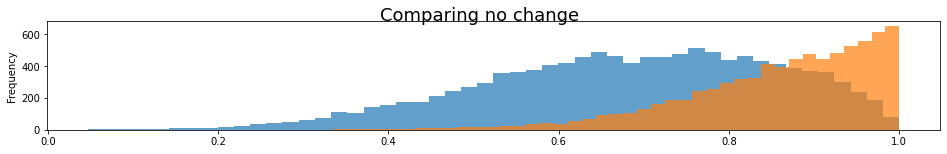

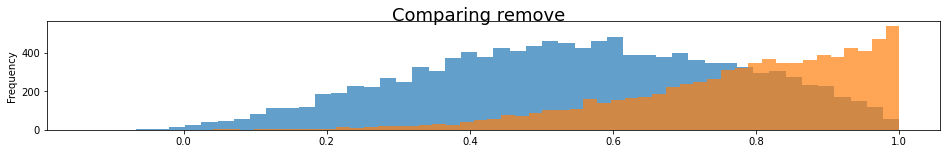

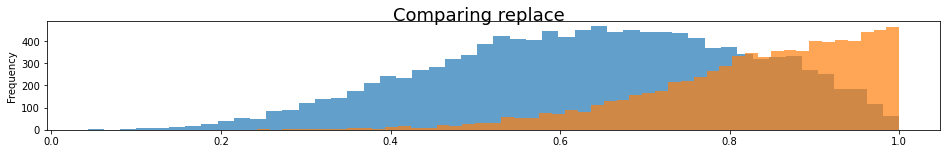

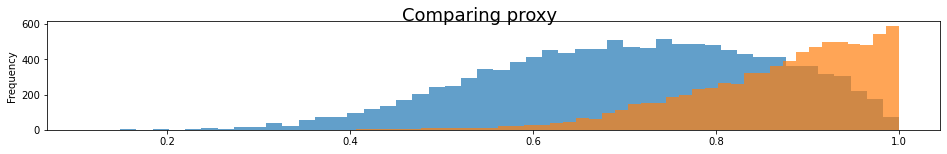

In [130]:
_ = compare_replacement_methods(quora,model1,experiments=experiments_org,ent_type='ORG')

# ToDos

- Diagram showing word2vec / token based flow vs contextual flow
- add stats to results: nr of entries, time taken, average similarity, 
- add evaluation: validate if prediction is now better
- Repeat analysis for People (PERSON), Places (GPE), 

In [12]:
experiments_org={
    'no change':{'stand_in':None,'col_name':''},
    'remove':{'stand_in':[''],'col_name':'_remove'},
    'replace':{'stand_in':['company'],'col_name':'_replace'},
    'proxy':{'stand_in':['IBM'],'col_name':'_proxy'},
}

In [14]:
quora.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_ent,q2_ent
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[{'text': 'india', 'label': 'GPE'}]",[]
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[{'text': 'Kohinoor', 'label': 'GPE'}]","[{'text': 'Indian', 'label': 'NORP'}]"
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,"[{'text': 'VPN', 'label': 'ORG'}]","[{'text': 'DNS', 'label': 'ORG'}]"
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,[],"[{'text': '24,23', 'label': 'CARDINAL'}]"
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[{'text': 'one', 'label': 'CARDINAL'}]",[]


In [ ]:
df, df_stats = compare_replacement_methods(quora.head(100000),
                                          model1,)

In [66]:
from src.utils import round_time_generic

In [77]:
round_time_generic(str(datetime.datetime.now())[:19],1)

'2020-09-26 22:00:00'

In [44]:
df_stats

,Time (secs),Nr Samples,Nr Duplicates,Avg Duplicates,Variance Duplicates,Nr Negative,Avg Negative,Variance Negative
0,7,505,196,0.858826,0.013867,309,0.678270,0.031312
1,6,505,196,0.792075,0.027349,309,0.540172,0.048076


In [45]:
alpha_hat,beta_hat=beta_parameter_estimation(0.821583,0.014278)
alpha_hat2,beta_hat2=beta_parameter_estimation(0.678270,0.031312)

In [49]:
alpha_hat2,beta_hat2

(4.048733978082429, 1.9204729425869633)

In [48]:
alpha_hat,beta_hat


(7.613157848524844, 1.653292222283394)

<AxesSubplot:>

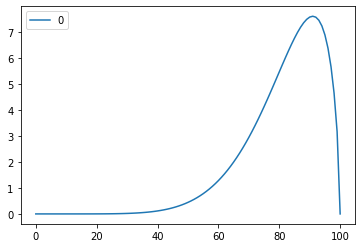

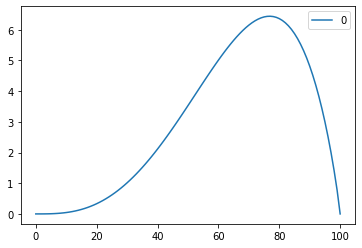

In [56]:
pdf_vec1=[200*beta_pdf(x/100,alpha_hat,beta_hat) for x in range(0,101)]
pdf_vec2=[300*beta_pdf(x/100,alpha_hat2,beta_hat2) for x in range(0,101)]
pd.DataFrame(pdf_vec1/(sum(pdf_vec1)/200)).plot()
pd.DataFrame(pdf_vec2/(sum(pdf_vec2)/300)).plot()

In [47]:
[beta_pdf(x/100,alpha_hat,beta_hat) for x in range(0,101)]

[0.0,
 2.009634750810237e-12,
 1.9543195088766638e-10,
 2.835338223117849e-09,
 1.8875754349891917e-08,
 8.200014117051733e-08,
 2.719257343129034e-07,
 7.484202279991912e-07,
 1.7971657365600975e-06,
 3.8883650086988895e-06,
 7.748782327889939e-06,
 1.4447733416682757e-05,
 2.5497377515986537e-05,
 4.2967515931179015e-05,
 6.961496155227143e-05,
 0.00010902741090725172,
 0.000165781622516963,
 0.0002456155813896315,
 0.0003556142083873465,
 0.0005044080540613073,
 0.0007023842986623646,
 0.00096190926275515,
 0.001297561515629982,
 0.0017263745509941769,
 0.0022680878807407744,
 0.002945405277462943,
 0.003784258774338856,
 0.004814076906585732,
 0.006068055551394352,
 0.007583429592611718,
 0.009401743501920036,
 0.011569118789313835,
 0.01413651613171439,
 0.0171599898389434,
 0.02070093216031321,
 0.024826304772019185,
 0.029608854614503948,
 0.03512731106907654,
 0.04146656127328325,
 0.04871780017368752,
 0.05697865170153509,
 0.06635325722980462,
 0.07695232722773256,
 0.0888931